In [1]:
%matplotlib notebook

import pandas as pd
from pprint import pprint

from ..search_util_old import Searcher

In [2]:
searcher = Searcher()
searcher.load_data()

In [10]:
STATES = [
    'Virginia',
    'Georgia',
    'Montana',
    'California',
    'Texas',
    'Florida',
    'Washington',
    'Arizona'
]

ASIN = 'B074H5784C'
QUERY = 'biotin'

In [11]:
def get_asin_position_in_search(target_asin, results):
    for pos, entry in enumerate(results['matches']['results']):
        if target_asin == entry['asin']:
            return 1 + pos
    return None

state_to_results = {}
for state in STATES:
    query_to_send = QUERY
    
    print '--------------------------------'
    print('Searching <%s> in <%s>...' % (query_to_send, state))
    state_to_results[state] = []
    for i in xrange(0, 3):
        print('Taking snapshot %d...' % (1 + i))
        result = searcher.search_with_retries(state, query_to_send)
        state_to_results[state].append(result)        

        asin_pos = get_asin_position_in_search(ASIN, result)
        print('Found %d matches. %s position: %s.' % (len(result['matches']), ASIN, asin_pos))

--------------------------------
Searching <biotin> in <Virginia>...
Taking snapshot 1...
Found 3 matches. B074H5784C position: None.
Taking snapshot 2...
Found 3 matches. B074H5784C position: 49.
Taking snapshot 3...
Found 3 matches. B074H5784C position: 49.
--------------------------------
Searching <biotin> in <Georgia>...
Taking snapshot 1...
Found 3 matches. B074H5784C position: 49.
Taking snapshot 2...
Found 3 matches. B074H5784C position: 49.
Taking snapshot 3...
Found 3 matches. B074H5784C position: 49.
--------------------------------
Searching <biotin> in <Montana>...
Taking snapshot 1...
Found 3 matches. B074H5784C position: None.
Taking snapshot 2...
Found 3 matches. B074H5784C position: 49.
Taking snapshot 3...
Found 3 matches. B074H5784C position: 49.
--------------------------------
Searching <biotin> in <California>...
Taking snapshot 1...
Found 3 matches. B074H5784C position: None.
Taking snapshot 2...
Found 3 matches. B074H5784C position: None.
Taking snapshot 3...
Fo

In [12]:
def convert_observations_to_df(observations):
    state_to_pos = {}
    for state, results in observations.iteritems():
        state_to_pos[state] = []
        for search_result in results:
            pos = get_asin_position_in_search(ASIN, search_result)
            state_to_pos[state].append(pos)
    pprint(state_to_pos)
    return pd.DataFrame.from_dict(state_to_pos, orient='index')

pos_df = convert_observations_to_df(state_to_results)

OUTPUT_DIR = '/Users/evgenyp/Projects/AmzJet/AmzJet/__staging__/amz_local_search/'
pos_df.to_csv(OUTPUT_DIR + ''.join([ASIN, '_', QUERY.replace(' ', '_'), '.csv']), header=False)

{'Arizona': [None, None, None],
 'California': [None, None, None],
 'Florida': [None, None, 49],
 'Georgia': [49, 49, 49],
 'Montana': [None, 49, 49],
 'Texas': [49, None, 49],
 'Virginia': [None, 49, 49],
 'Washington': [None, None, None]}


In [7]:
pos_df.fillna(50).mean(axis=1)

Georgia       13.333333
Arizona       15.666667
Washington     9.666667
Florida       17.333333
Virginia      13.000000
Montana       16.333333
California    11.000000
Texas         10.000000
dtype: float64

In [7]:
pos_df.fillna(50).std(axis=1)

Georgia      NaN
Washington   NaN
Florida      NaN
Arizona      NaN
California   NaN
Montana      NaN
Texas        NaN
dtype: float64

<IPython.core.display.Javascript object>


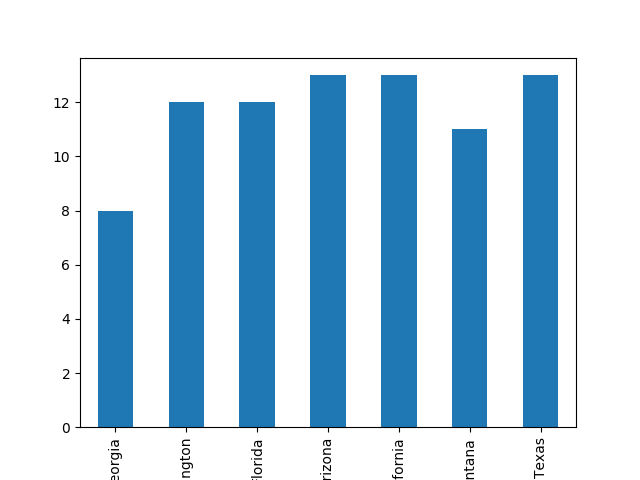

In [15]:
pos_df.fillna(50).mean(axis=1).plot(kind='bar')